# shape-comparison of overlay to data using EventWeight, after each of the event-selection cuts
The hypothesis to be tested: is the data/mc mismatch coming from underestimated cosmic contribution?

If this is the case, then the goodness-of-fit will ~ improve with application of the cuts (since the cosmic contributions are reduced....)

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import json
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/EventWeight/'

In [3]:
versions['overlay date'] = '2018_08_01'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order)
print 'applied cuts to overlay'
overlay_scaling = get_samples_scaling( N_total='MC(tot) x POT', debug=0, OverlaySubsamples=OverlaySamples, f_POT=Nevents['f(POT)'])

285038 ccqe candidate pairs, 187286 in FV
49951 are 1mu-1p, 26.7%
41680 are other pairs, 22.3%
95655 are cosmic, 51.1%
--------------------------------------------------------------
24119 are CC 1p 0pi, 12.9%
--------------------------------------------------------------
26927 are CC 1p, 14.4%
I finished loading overlay samples. We have in total 285038 pairs
applied cuts to overlay


In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to beam-on'

applied cuts to beam-on


### $Q^2$ distribution in the selected events

In [5]:
mA_array = [0.40,0.70,0.80,0.95,0.99,1.00,1.10,1.15,1.35,1.71]
var,x_label = 'reco_Q2', r'$Q^2$ (GeV/c)$^2$'
bins = linspace(0,1,15); mid = 0.5*(bins[1:]+bins[:-1])
chi2_xrange = (0.,1)

In [19]:
def draw_Q2_data_overlay(cut='no cut',do_individual_histograms=False,mA_array=[0.55,0.99,1.7]
                         ,Q2min=0,Q2max=2):
    selected_overlay = dict()
    for pair_type in pair_types:
        selected_overlay[pair_type] = reducedOverlay[cut][pair_type]
    selected_overlay_concat = pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])    
    selected_events = reducedOnBeam[cut]

    fig=plt.figure(figsize=(12.944,8))
    ax = fig.add_subplot(1,1,1)
    data = selected_events[(selected_events['reco_Q2']>Q2min)&(selected_events['reco_Q2']<Q2max)]
    print len(data),'events in the data'

    mc_samples = dict()
    for pair_type in pair_types[0:4]:
        mc_sample = reducedOverlay[cut][pair_type]
        mc_samples[pair_type] = mc_sample[(mc_sample['reco_Q2']>Q2min)&(mc_sample['reco_Q2']<Q2max)]
    mc_concat = pd.concat([mc_samples['1mu-1p'],mc_samples['cosmic'],mc_samples['other pairs']])    
    print len(mc_concat),'events in the mc'

    
    h_OnBeam,h_OnBeam_err=plot_OnBeam(OnBeamSample=data,color='purple',var=var, bins=bins, markersize=12
                                      , ax=ax, do_return_h=True)    
    for mA,color in zip( mA_array,['tomato','royalblue','forestgreen']):
        name = '%.0f'%(mA*100) 
        h_overlay, h_overlay_err = plot_stacked_MCsamples( OverlaySamples=mc_samples,stackLabel=None
                                                          , weights_var='evwgh_mA'+name+'_Genie'
                                                          , norm=len(data)
                                                          , do_draw=True, ax=ax
                                                          , overlay_scaling=overlay_scaling
                                                          , var=var, bins=bins 
                                                          , do_individual_histograms=do_individual_histograms
                                                         )
        if chi2_xrange is not None:
            chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                             , h1=h_OnBeam , h1err=h_OnBeam_err
                                             , h2=h_overlay ,  h2err=h_overlay_err
                                             , debug=0 if mA==0.4 else 0)
        plt.step( mid , h_overlay, where='mid',color=color, label='$m_A=%.2f$'%mA+', $\chi^2_{red}=%.1f$'%(chi2/ndf))
    set_axes(ax,x_label,'',do_add_grid=False,alpha_grid=1,ylim=(0,1.2*np.max(h_OnBeam+h_OnBeam_err))
             ,do_add_legend=True,legend_loc='upper right')

350 events in the data
8978 events in the mc
129 events in the data
2462 events in the mc


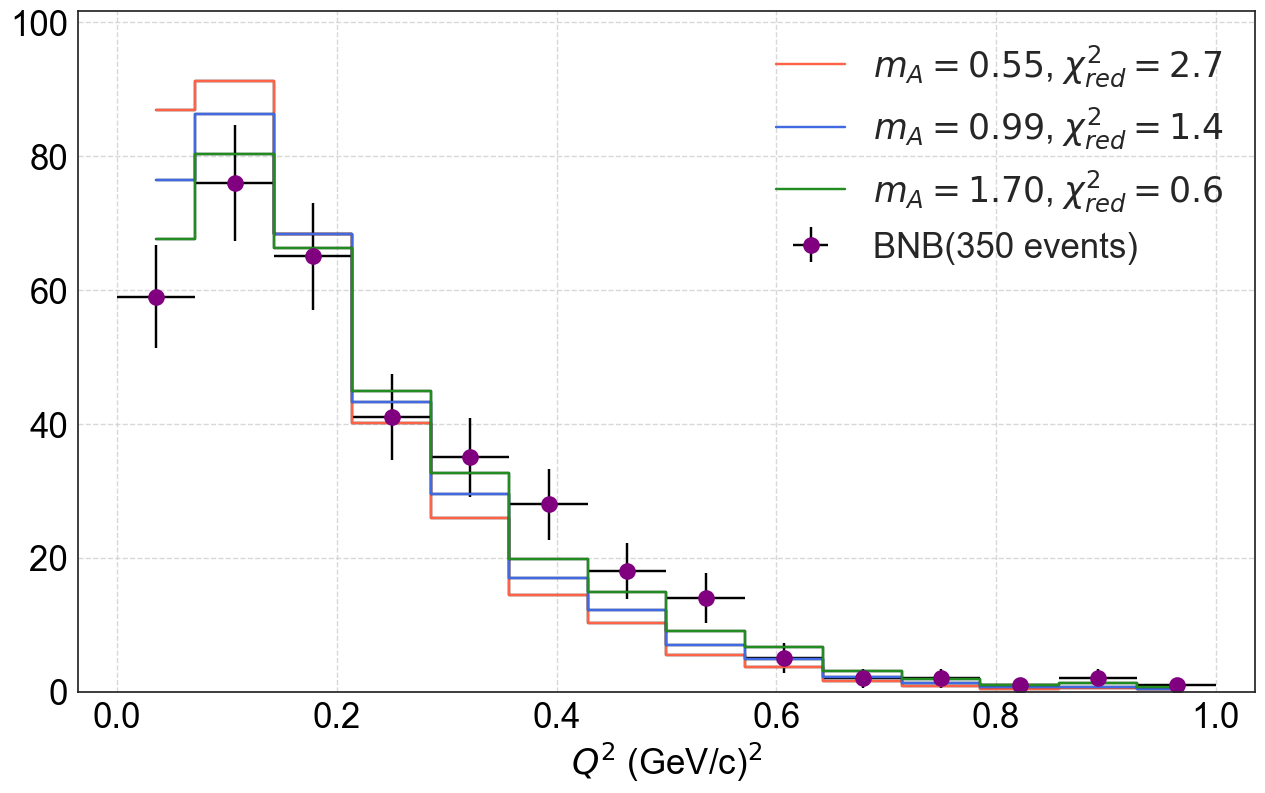

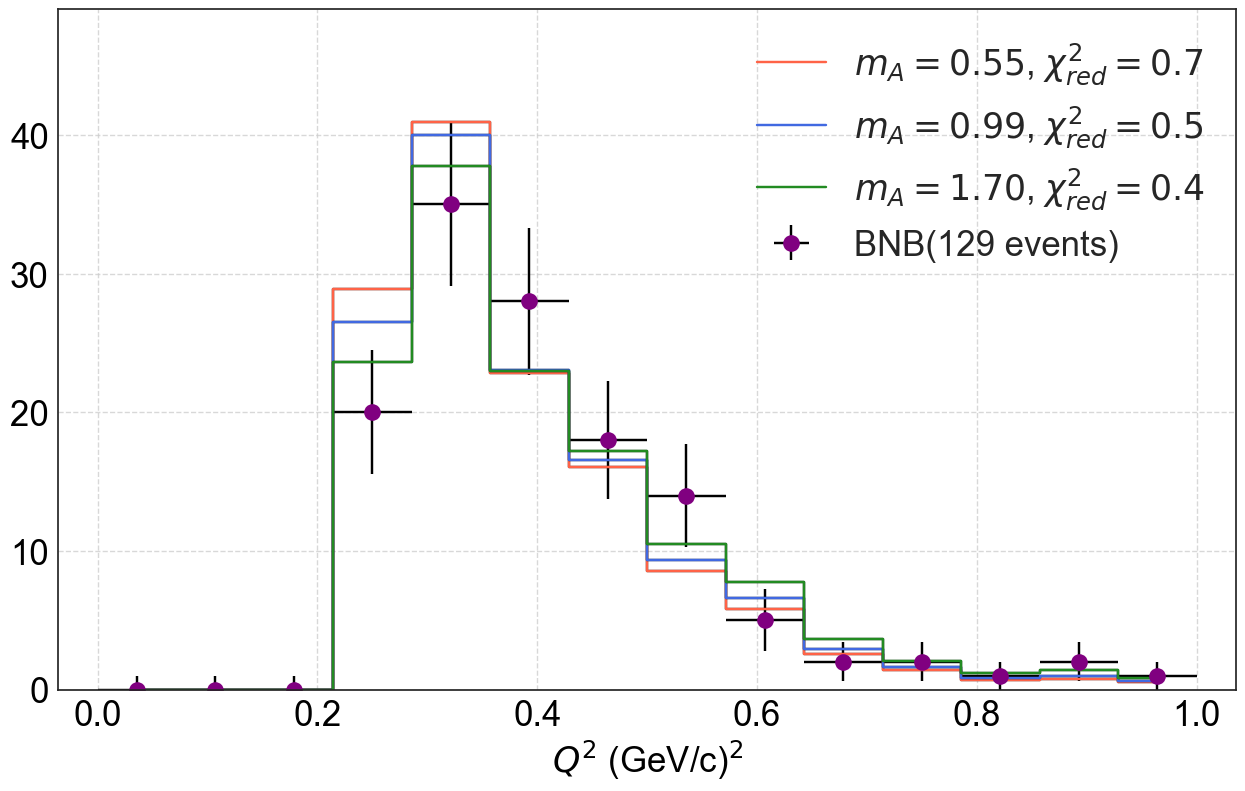

In [22]:
draw_Q2_data_overlay(cut='Pt & delta phi')
draw_Q2_data_overlay(cut='Pt & delta phi',Q2min=0.25)

# all cuts sequentially

187286 events in the overlay
44628 events in the overlay
31125 events in the overlay
26696 events in the overlay
23359 events in the overlay
16487 events in the overlay
10278 events in the overlay
8978 events in the overlay


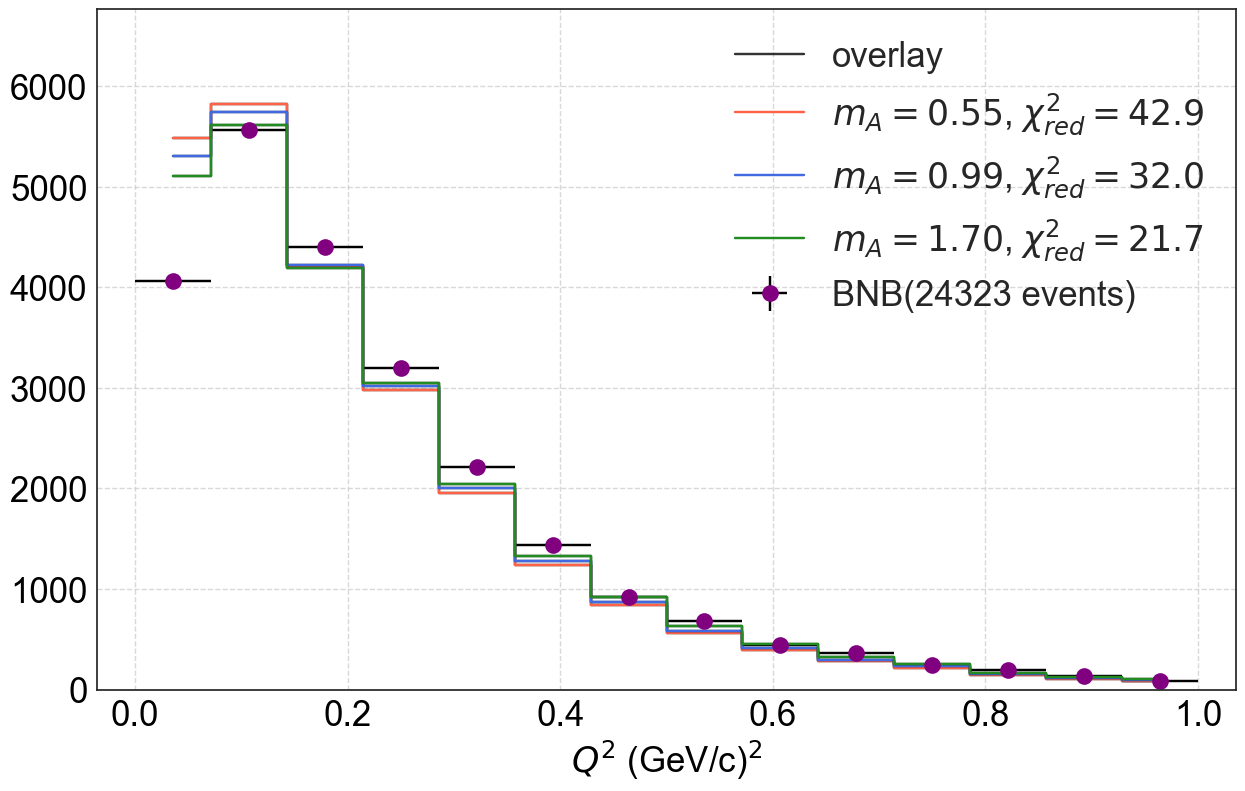

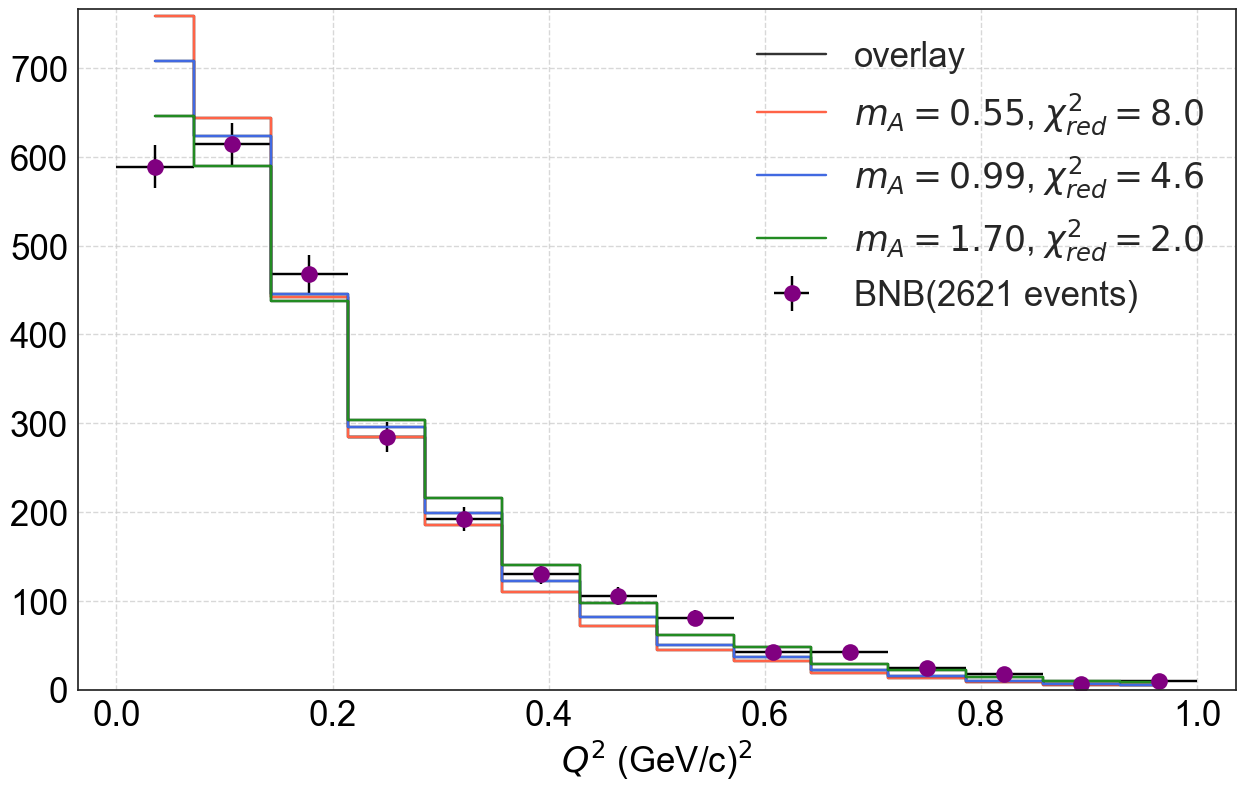

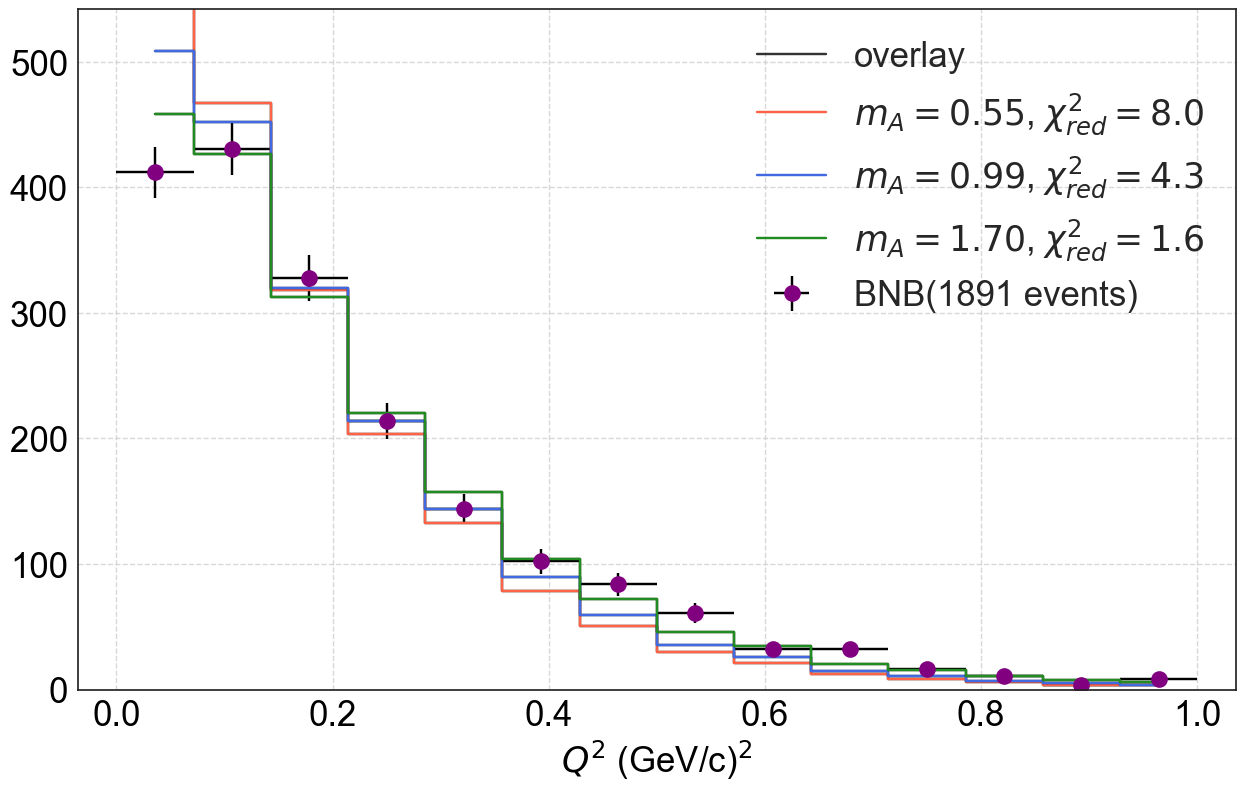

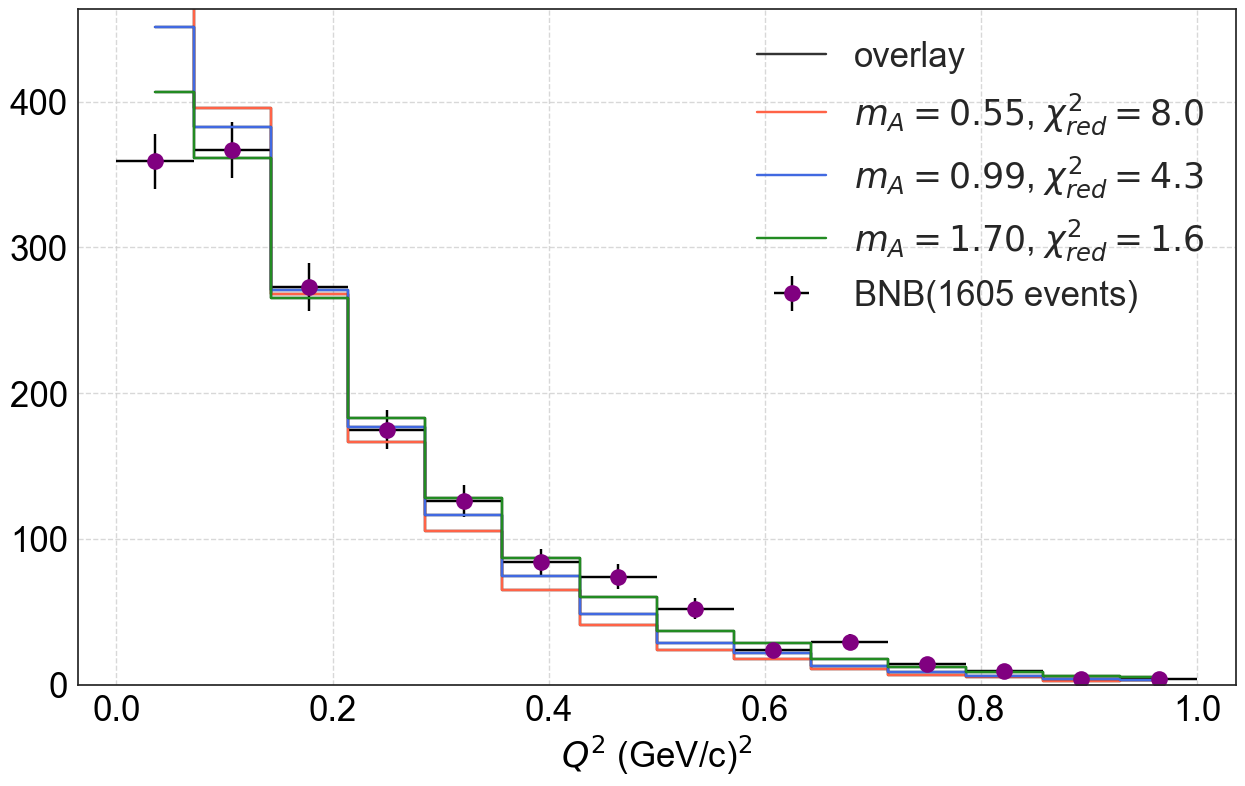

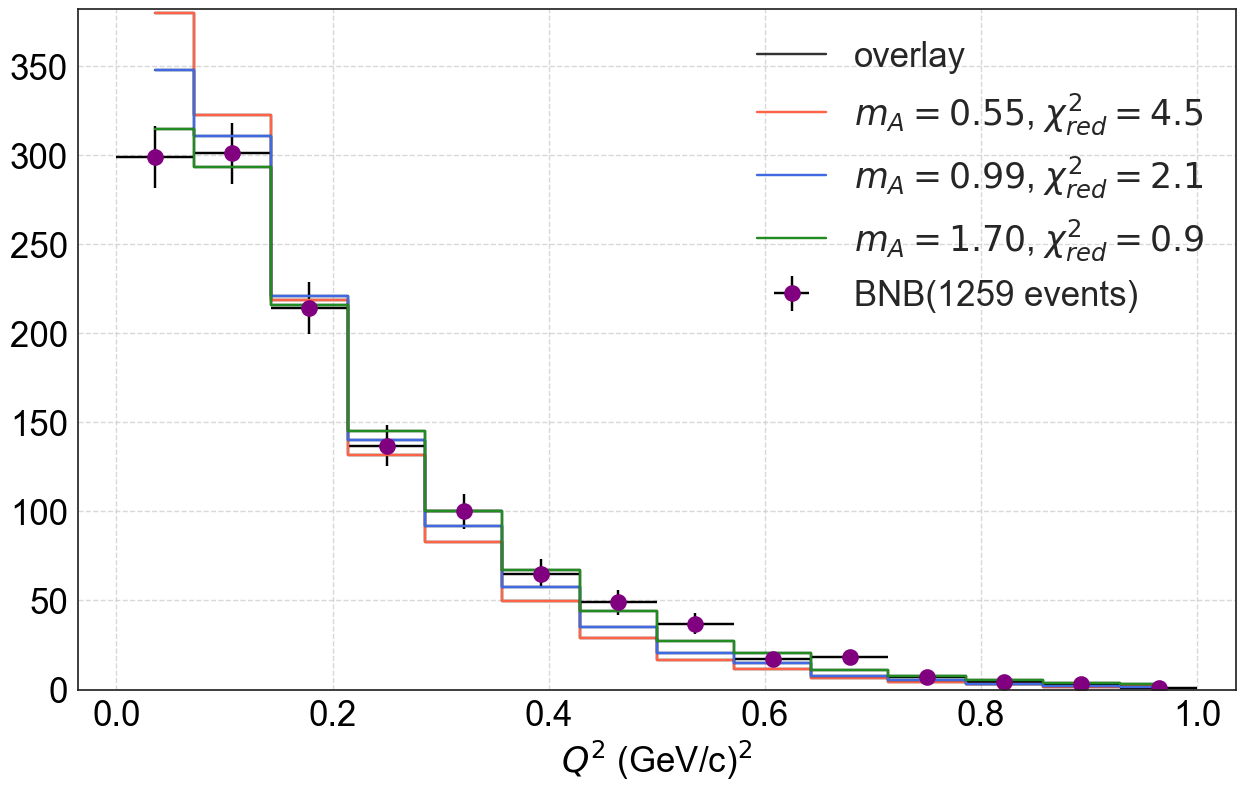

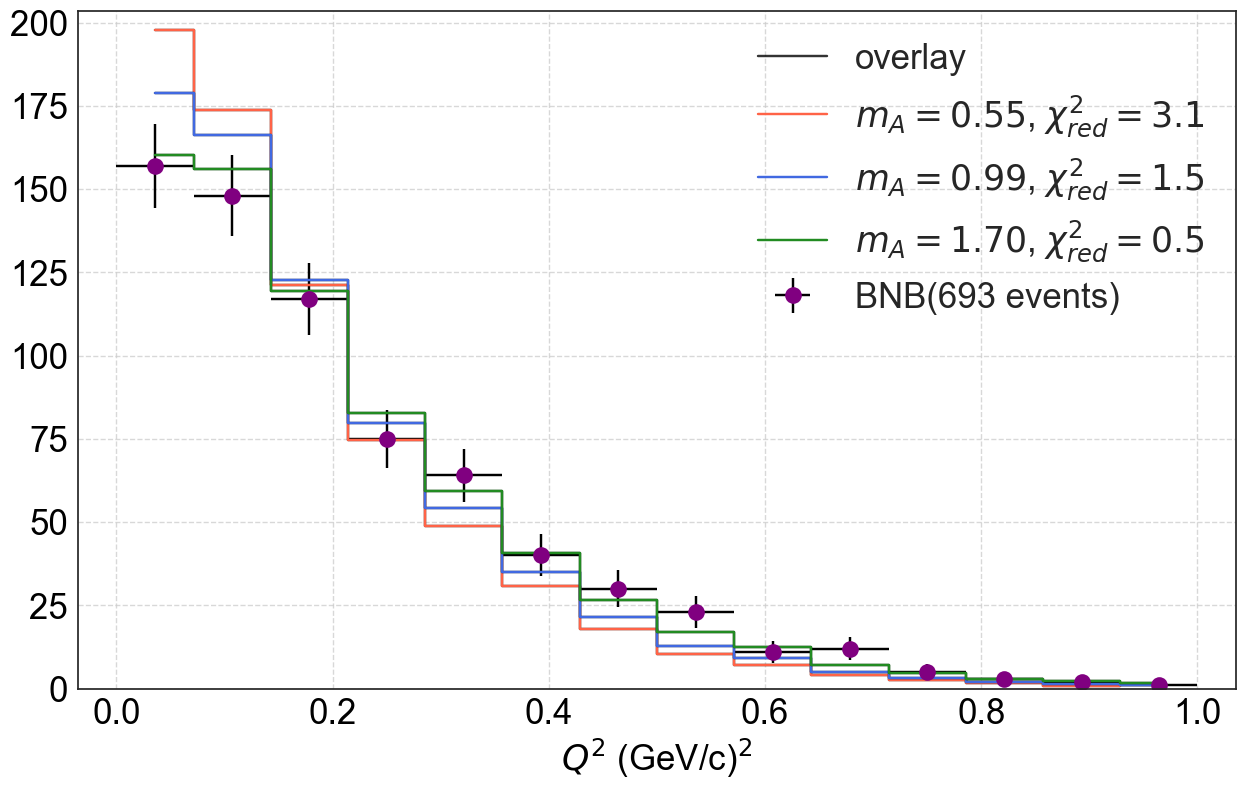

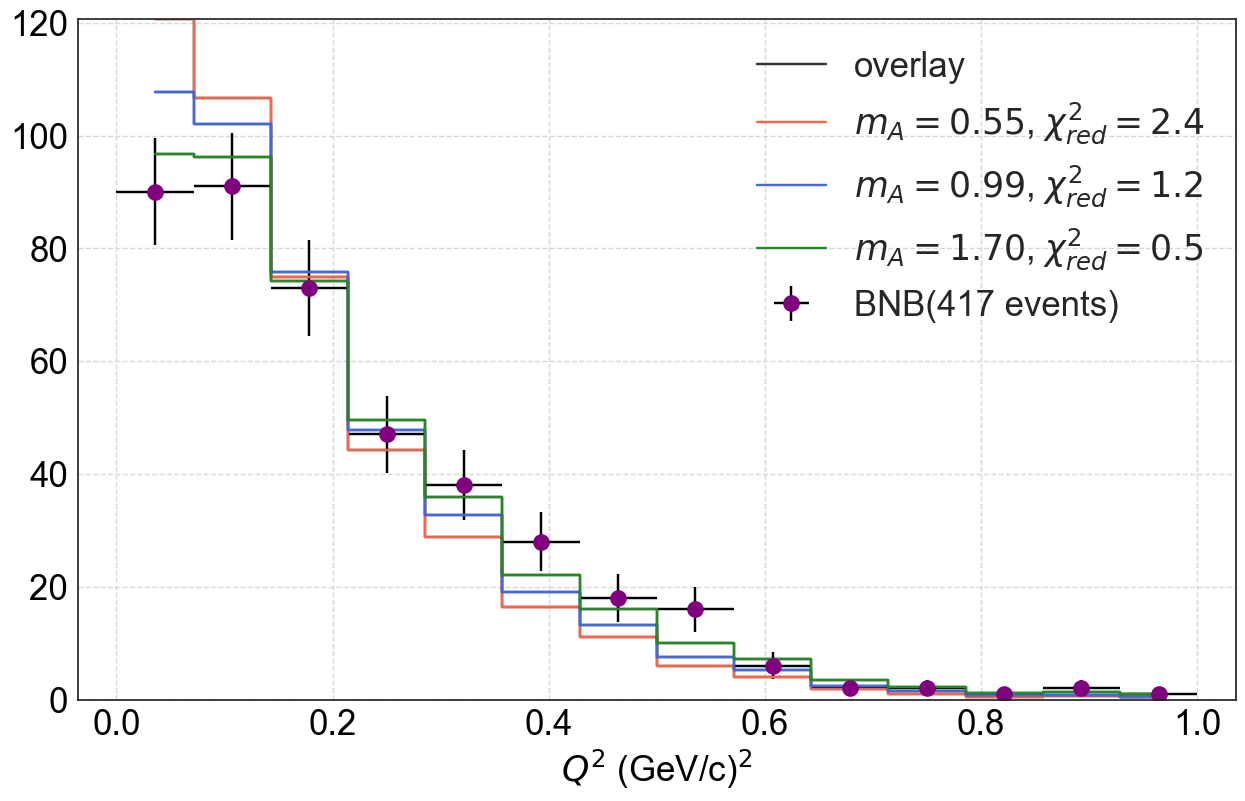

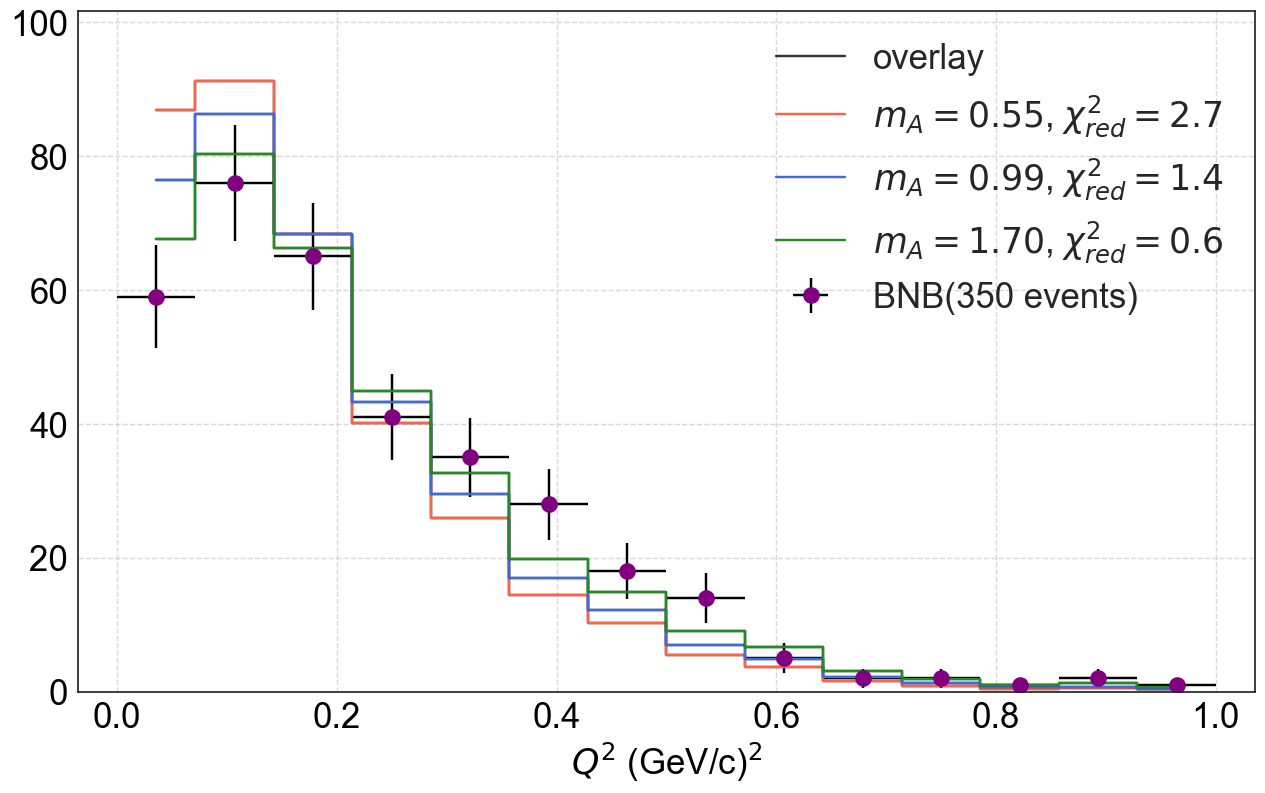

In [7]:
for cut in cuts_order:
    draw_Q2_data_overlay(cut=cut)

# Where does the contribution of cosmic events sit in the reconstructed $Q^2$ distirbution?

8978 events in the overlay


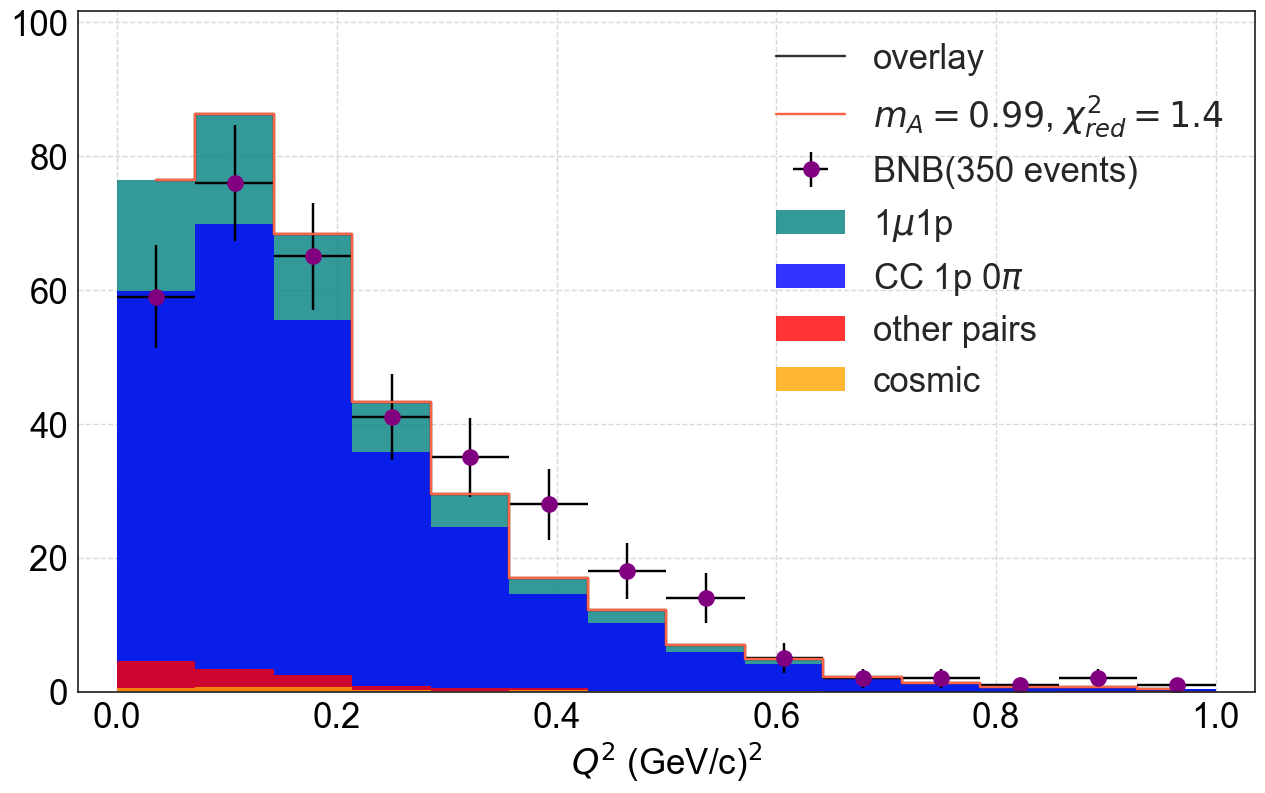

In [8]:
draw_Q2_data_overlay(cut='Pt & delta phi',do_individual_histograms=True,mA_array=[0.99])